### 【問題1】線形回帰のクラスを作成する
線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。
以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [1]:
# import module
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
'''
Kaggle House Prices: "Advanced Regression Techniques"のデータを取り込み、重回帰分析のスクラッチを行う。

目的変数：'SalePrice' / '家の査定金額'
説明変数：'GrLivArea', 'YearBuilt' / 'リビングの大きさ'、'築年'

課題の目的：スクッチとクラスの構造に慣れる。

'''

# import file
df_train = pd.read_csv("train.csv")

house_X = df_train.loc[:, ['GrLivArea', 'YearBuilt']].values

house_y = df_train['SalePrice'].values
# house_y = house_y.rename(columns={0:'SalesPrice'})

 # split train data and test data
X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.3, random_state=42)

# house_X.to_csv("linear_X.csv" )
# house_y.to_csv("linear_y.csv")

In [3]:
# # split train data and test data
# X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.3, random_state=42)

# data_len = len(X_train) 

# mu = X_train.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
# sigma = X_train.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

# # 標準化処理
# X_norm = (X_train -mu)/sigma

# data_len = len(X)
        
# mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
# sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）
 
                
# # 3. パラメータをランダム値で初期化
# theta = np.random.rand(X.shape[1])

# # Xの０列目に「１」のベクトルを追加
# X_one =  np.hstack((np.ones((data_len, 1)), X_norm))
# print(X_one.shape)
# print(y_train.shape)
# print(theta.shape)
# error = 0.5*np.sum((y_train-(np.dot(X_one, theta)))**2)

# count = 0

# for _ in range(10):
#     theta_temp = theta - 0.001*np.dot(((np.dot(X, theta))-y_train), X)
#     theta = theta_temp

#     current_error = np.sum(((np.dot(X, theta)) - y_train) ** 2)
#     diff = error - current_error
#     error = current_error

#     count += 1
#     log = "{}回目、誤差：{}"
#     print(log.format(count, diff))



In [4]:
# fit
# # split train data and test data
# X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.3, random_state=42)


# m = len(X_train)
# n = X_train.shape[1]

# mu = X_train.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
# sigma = X_train.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

# # 標準化処理
# X_train = (X_train -mu)/sigma

# # Xの０列目に「１」のベクトルを追加

# X_train = np.hstack((np.ones(m).reshape(m, 1),X_train))
# theta = np.random.rand(X_train.shape[1], 1)

# alpha = 0.1
# y_train = y_train.reshape(m, 1)
# hx = np.dot(X_train, theta)
# count = 0
# error = 0.5*np.sum(((np.dot(X_train, theta)-y_train))**2)

# for i in range(200):
#     theta = theta - alpha *  (1/m) * (np.dot(X_train.T, (hx-y_train)))
#     hx = np.dot(X_train, theta)
#     current_error = 0.5*np.sum(((np.dot(X_train, theta)) - y_train) ** 2)
#     diff = error - current_error
#     error = current_error
#     count += 1
#     log = "{}回目、誤差：{}"

#     print(log.format(count, diff))

    
# # predict

# print(hx)

# #     # trainデータのlossのリザルトを出す
# #     if self.verbose:
# #         self.loss[i] = self.MSE(hx, y)

# #     # X_val入力ある場合MSEのリザルトを出す
# #     if type(X_val) == np.ndarray:
# #         val_pred = self._linear_hypothesis(X_val)
# #         self.val_loss[i] = self.MSE(val_pred, y_val)

In [61]:
import numpy as np

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=500, lr=0.01, bias=True, verbose=True, num_feature=2):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        # thetaを保存するリストを作成
        self.theta = np.zeros((self.num_iter, int(bias) + num_feature))
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        self._gradient_descent(X, y)
        self.use_loss = self.loss
        
        # X_val入力ある場合MSEのリザルトを出す
        if type(X_val) == np.ndarray:
            val_pred = np.dot(X_val, self.theta.T)
            m_val = len(y_val)
            for i in range(self.num_iter):
                self.val_loss[i] = (0.5*(1/m_val)*np.sum(((val_pred[:, i] - y_val) ** 2)))
    
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        hx = np.dot(X, self.coef_)
        return hx
    

    def _gradient_descent(self, X, y):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._linear_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            self.coef_ = self.coef_ - alpha *  (1/m) * (np.dot(X.T, (hx-y)))
            self.theta[i] = self.coef_.T
            
            hx = self._linear_hypothesis(X)
            
            if self.verbose:
                log = 'COUNT:{}, MSE:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.MSE(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self._compute_cost(X, y)  
                
            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        hx = np.dot(X, self.coef_)
        
        return hx
            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        mse = (0.5*(1/m)*np.sum(((y_pred - y) ** 2)))
        
        return mse
        
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        J = self.MSE(self._linear_hypothesis(X), y)
        
        return J

In [62]:
slr= ScratchLinearRegression()

slr.fit(X_train, y_train, X_test, y_test)

COUNT:1, MSE:19075057129.05886
COUNT:2, MSE:18711359625.89928
COUNT:3, MSE:18355032389.554127
COUNT:4, MSE:18005925665.410847
COUNT:5, MSE:17663892750.635395
COUNT:6, MSE:17328789931.78003
COUNT:7, MSE:17000476423.671148
COUNT:8, MSE:16678814309.550919
COUNT:9, MSE:16363668482.446833
COUNT:10, MSE:16054906587.743853
COUNT:11, MSE:15752398966.934479
COUNT:12, MSE:15456018602.52242
COUNT:13, MSE:15165641064.056114
COUNT:14, MSE:14881144455.268913
COUNT:15, MSE:14602409362.303053
COUNT:16, MSE:14329318802.995169
COUNT:17, MSE:14061758177.201498
COUNT:18, MSE:13799615218.141354
COUNT:19, MSE:13542779944.73794
COUNT:20, MSE:13291144614.935982
COUNT:21, MSE:13044603679.976057
COUNT:22, MSE:12803053739.605972
COUNT:23, MSE:12566393498.209913
COUNT:24, MSE:12334523721.836445
COUNT:25, MSE:12107347196.106947
COUNT:26, MSE:11884768684.986319
COUNT:27, MSE:11666694890.398245
COUNT:28, MSE:11453034412.66768
COUNT:29, MSE:11243697711.773502
COUNT:30, MSE:11038597069.3947
COUNT:31, MSE:10837646551.7

In [63]:
hx = slr.predict(X_test)

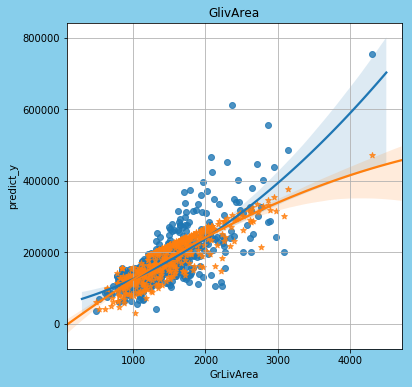

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

'''
predict data　と　test dataの散布図を各説明変数ごとに二次元にプロットする。

'''

predict_y = pd.DataFrame(hx)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

plot_predict = pd.DataFrame(pd.concat([test_X, test_y, predict_y], axis=1).values)
plot_predict = plot_predict.rename(columns={0:'GrLivArea', 1:'YearBuilt', 2:'test_y', 3:'predict_y'})

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("GlivArea")
# plt.xlabel("GrLivArea")
# plt.ylabel("loss")

sns.regplot('GrLivArea', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('GrLivArea', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

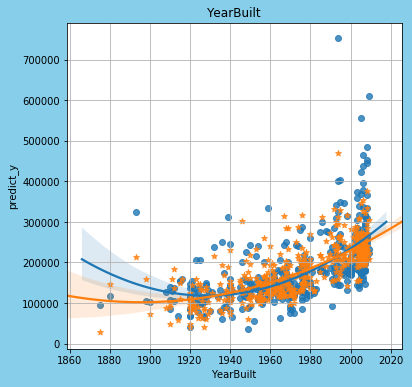

In [65]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()


# plot a cross section of mt.Fuji
plt.title("YearBuilt")
# plt.xlabel("YearBuilt")
# plt.ylabel("loss")


sns.regplot('YearBuilt', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('YearBuilt', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

### 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

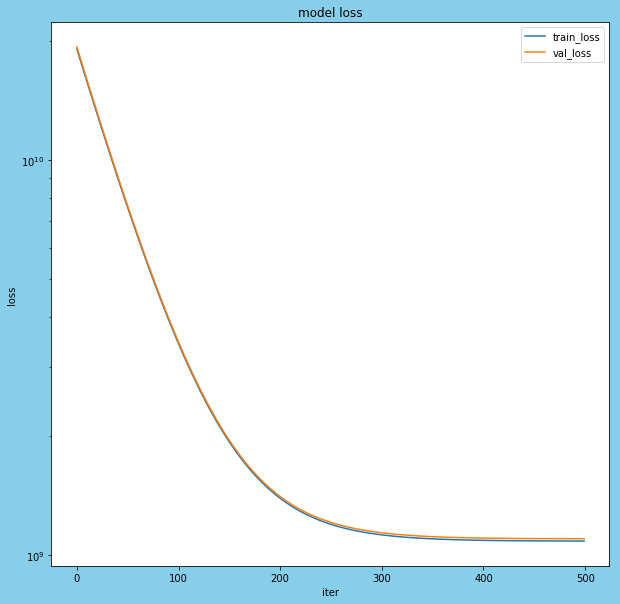

In [79]:
df_loss = pd.DataFrame(slr.use_loss)
# df_loss = df_loss - 1080000000
val_loss = pd.DataFrame(slr.val_loss)
# val_loss = val_loss - 1080000000

# define Initial setting 
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
ax.set_yscale('log') 
plt.grid()


# plot a cross section of mt.Fuji
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")

p1, = plt.plot(df_loss, label='o')
p2, = plt.plot(val_loss, label='*')
plt.legend([p1, p2],["train_loss", "val_loss"], loc=1) # 凡例の位置, 名前の指定

plt.grid()
plt.show()

### 【問題3】（アドバンス課題）バイアス項の除去
バイアス項 θ0 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

バイアス項を除くと、特徴量がすべて平均以下の場合、目的変数がマイナスになってしまうため、適切なモデルがつくれず、誤差が小さくならない。

In [67]:
slr_bf = ScratchLinearRegression(num_iter=500, lr=0.01, bias=False, verbose=True)
slr_bf.fit(X_train, y_train)

COUNT:1, MSE:19402245484.603363
COUNT:2, MSE:19359136137.336044
COUNT:3, MSE:19317017352.628532
COUNT:4, MSE:19275866331.983646
COUNT:5, MSE:19235660802.25599
COUNT:6, MSE:19196379003.53559
COUNT:7, MSE:19157999677.31119
COUNT:8, MSE:19120502054.90669
COUNT:9, MSE:19083865846.184418
COUNT:10, MSE:19048071228.50914
COUNT:11, MSE:19013098835.966724
COUNT:12, MSE:18978929748.831577
COUNT:13, MSE:18945545483.277214
COUNT:14, MSE:18912927981.32414
COUNT:15, MSE:18881059601.01982
COUNT:16, MSE:18849923106.84517
COUNT:17, MSE:18819501660.342464
COUNT:18, MSE:18789778810.959454
COUNT:19, MSE:18760738487.104824
COUNT:20, MSE:18732364987.40998
COUNT:21, MSE:18704642972.192493
COUNT:22, MSE:18677557455.11651
COUNT:23, MSE:18651093795.045597
COUNT:24, MSE:18625237688.083523
COUNT:25, MSE:18599975159.79878
COUNT:26, MSE:18575292557.62837
COUNT:27, MSE:18551176543.457005
COUNT:28, MSE:18527614086.367393
COUNT:29, MSE:18504592455.557884
COUNT:30, MSE:18482099213.423454
COUNT:31, MSE:18460122208.79633

In [68]:
slr_bf.predict(X_test)

array([[-4.88844926e+04],
       [ 1.31470630e+05],
       [-9.24025282e+04],
       [-1.05133473e+04],
       [ 5.16109111e+04],
       [-8.01296718e+04],
       [ 7.91999878e+03],
       [ 4.16387246e+03],
       [-8.23383887e+04],
       [-2.71601552e+04],
       [-4.90794533e+04],
       [-6.16041950e+04],
       [-9.61674560e+04],
       [ 4.03054285e+04],
       [ 5.04623848e+04],
       [-6.55697760e+04],
       [ 5.77006681e+04],
       [-4.59916985e+04],
       [-1.01637490e+05],
       [ 3.39354841e+04],
       [ 1.36001735e+04],
       [ 4.98944199e+04],
       [ 3.58621160e+04],
       [-6.90267399e+04],
       [ 2.50046910e+04],
       [-3.43603011e+03],
       [ 2.52829810e+04],
       [-8.13185711e+04],
       [ 3.90628739e+04],
       [ 2.53069625e+04],
       [-9.23229939e+04],
       [ 8.72495426e+04],
       [ 1.22090568e+05],
       [-6.75222868e+04],
       [ 5.20110059e+04],
       [-4.02818499e+04],
       [ 1.53665252e+04],
       [ 7.61542006e+04],
       [ 1.2

### 問題4】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

多次元化を行うと、訓練データの誤差は小さくなるが、テストデータの誤差は大きくなる。

In [33]:
# 特徴量の二乗に関する検討
import numpy as np

class ScratchLinearRegressionSquared():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=500, lr=0.01, bias=True, verbose=True, num_feature=2):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        # thetaを保存するリストを作成
        self.theta = np.zeros((self.num_iter, int(bias) + num_feature))
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        X = X**2 # Squared
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        self._gradient_descent(X, y)
        self.use_loss = self.loss
        
        # X_val入力ある場合MSEのリザルトを出す
        if type(X_val) == np.ndarray:
            val_pred = np.dot(X_val, self.theta.T)
            m_val = len(y_val)
            for i in range(self.num_iter):
                self.val_loss[i] = (0.5*(1/m_val)*np.sum(((val_pred[:, i] - y_val) ** 2)))
    
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        hx = np.dot(X, self.coef_)
        return hx
    

    def _gradient_descent(self, X, y):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._linear_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            self.coef_ = self.coef_ - alpha *  (1/m) * (np.dot(X.T, (hx-y)))
            self.theta[i] = self.coef_.T
            
            hx = self._linear_hypothesis(X)
            
            if self.verbose:
                log = 'COUNT:{}, MSE:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.MSE(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self._compute_cost(X, y)  
                
            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        hx = np.dot(X, self.coef_)
        
        return hx
            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        mse = (0.5*(1/m)*np.sum(((y_pred - y) ** 2)))
        
        return mse
        
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        J = self.MSE(self._linear_hypothesis(X), y)
        
        return J

In [34]:
slrs = ScratchLinearRegressionSquared()
slrs.fit(X_train, y_train, X_test, y_test)
hx_squared = slrs.predict(X_test)

COUNT:1, MSE:19080761955.73295
COUNT:2, MSE:18722604512.616863
COUNT:3, MSE:18371660760.347885
COUNT:4, MSE:18027785223.118034
COUNT:5, MSE:17690835362.909973
COUNT:6, MSE:17360671520.081783
COUNT:7, MSE:17037156855.15542
COUNT:8, MSE:16720157291.78424
COUNT:9, MSE:16409541460.87579
COUNT:10, MSE:16105180645.846363
COUNT:11, MSE:15806948728.98437
COUNT:12, MSE:15514722138.900045
COUNT:13, MSE:15228379799.039433
COUNT:14, MSE:14947803077.241058
COUNT:15, MSE:14672875736.314138
COUNT:16, MSE:14403483885.617609
COUNT:17, MSE:14139515933.619667
COUNT:18, MSE:13880862541.417948
COUNT:19, MSE:13627416577.200808
COUNT:20, MSE:13379073071.630709
COUNT:21, MSE:13135729174.130909
COUNT:22, MSE:12897284110.0572
COUNT:23, MSE:12663639138.736732
COUNT:24, MSE:12434697512.356323
COUNT:25, MSE:12210364435.683023
COUNT:26, MSE:11990547026.60013
COUNT:27, MSE:11775154277.44197
COUNT:28, MSE:11564097017.111422
COUNT:29, MSE:11357287873.96419
COUNT:30, MSE:11154641239.44433
COUNT:31, MSE:10956073232.4557

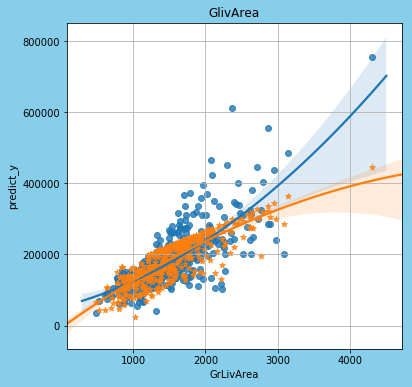

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

predict_y = pd.DataFrame(hx_squared)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

plot_predict = pd.DataFrame(pd.concat([test_X, test_y, predict_y], axis=1).values)
plot_predict = plot_predict.rename(columns={0:'GrLivArea', 1:'YearBuilt', 2:'test_y', 3:'predict_y'})

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("GlivArea")
# plt.xlabel("GrLivArea")
# plt.ylabel("loss")

sns.regplot('GrLivArea', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('GrLivArea', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

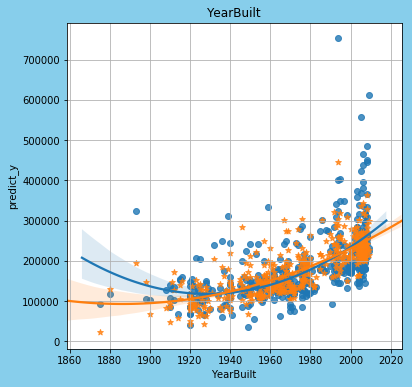

In [36]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()


# plot a cross section of mt.Fuji
plt.title("YearBuilt")
# plt.xlabel("YearBuilt")
# plt.ylabel("loss")


sns.regplot('YearBuilt', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('YearBuilt', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

In [37]:
# 特徴量の三乗に関する検討
import numpy as np

class ScratchLinearRegressionCubed():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=500, lr=0.01, bias=True, verbose=True, num_feature=2):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        # thetaを保存するリストを作成
        self.theta = np.zeros((self.num_iter, int(bias) + num_feature))
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        X = X**3 # Cubed
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        self._gradient_descent(X, y)
        self.use_loss = self.loss
        
        # X_val入力ある場合MSEのリザルトを出す
        if type(X_val) == np.ndarray:
            val_pred = np.dot(X_val, self.theta.T)
            m_val = len(y_val)
            for i in range(self.num_iter):
                self.val_loss[i] = (0.5*(1/m_val)*np.sum(((val_pred[:, i] - y_val) ** 2)))
    
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        hx = np.dot(X, self.coef_)
        return hx
    

    def _gradient_descent(self, X, y):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._linear_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            self.coef_ = self.coef_ - alpha *  (1/m) * (np.dot(X.T, (hx-y)))
            self.theta[i] = self.coef_.T
            
            hx = self._linear_hypothesis(X)
            
            if self.verbose:
                log = 'COUNT:{}, MSE:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.MSE(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self._compute_cost(X, y)  
                
            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        hx = np.dot(X, self.coef_)
        
        return hx
            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        mse = (0.5*(1/m)*np.sum(((y_pred - y) ** 2)))
        
        return mse
        
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        J = self.MSE(self._linear_hypothesis(X), y)
        
        return J
        

In [38]:
slrc = ScratchLinearRegressionCubed()
slrc.fit(X_train, y_train, X_test, y_test)
hx_cubed = slrc.predict(X_test)

COUNT:1, MSE:19090371058.728657
COUNT:2, MSE:18741627152.522903
COUNT:3, MSE:18399866829.816605
COUNT:4, MSE:18064950181.762367
COUNT:5, MSE:17736740103.780853
COUNT:6, MSE:17415102239.324818
COUNT:7, MSE:17099904924.77146
COUNT:8, MSE:16791019135.42049
COUNT:9, MSE:16488318432.575666
COUNT:10, MSE:16191678911.688112
COUNT:11, MSE:15900979151.540049
COUNT:12, MSE:15616100164.44805
COUNT:13, MSE:15336925347.465425
COUNT:14, MSE:15063340434.563574
COUNT:15, MSE:14795233449.772738
COUNT:16, MSE:14532494661.262846
COUNT:17, MSE:14275016536.345617
COUNT:18, MSE:14022693697.379402
COUNT:19, MSE:13775422878.558613
COUNT:20, MSE:13533102883.570097
COUNT:21, MSE:13295634544.098913
COUNT:22, MSE:13062920679.166538
COUNT:23, MSE:12834866055.284807
COUNT:24, MSE:12611377347.40916
COUNT:25, MSE:12392363100.675182
COUNT:26, MSE:12177733692.90274
COUNT:27, MSE:11967401297.852251
COUNT:28, MSE:11761279849.218018
COUNT:29, MSE:11559285005.343872
COUNT:30, MSE:11361334114.646542
COUNT:31, MSE:1116734618

COUNT:495, MSE:1668371113.7901597
COUNT:496, MSE:1668354867.1142306
COUNT:497, MSE:1668338944.7031398
COUNT:498, MSE:1668323340.0834587
COUNT:499, MSE:1668308046.9110212
COUNT:500, MSE:1668293058.9683437


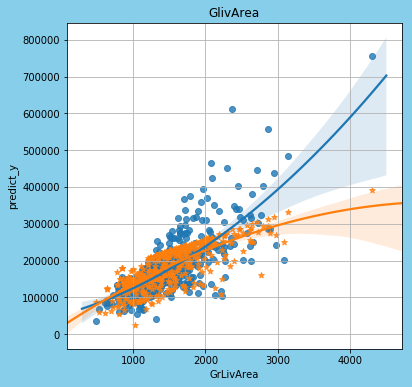

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

predict_y = pd.DataFrame(hx_cubed)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

plot_predict = pd.DataFrame(pd.concat([test_X, test_y, predict_y], axis=1).values)
plot_predict = plot_predict.rename(columns={0:'GrLivArea', 1:'YearBuilt', 2:'test_y', 3:'predict_y'})

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("GlivArea")
# plt.xlabel("GrLivArea")
# plt.ylabel("loss")

sns.regplot('GrLivArea', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('GrLivArea', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

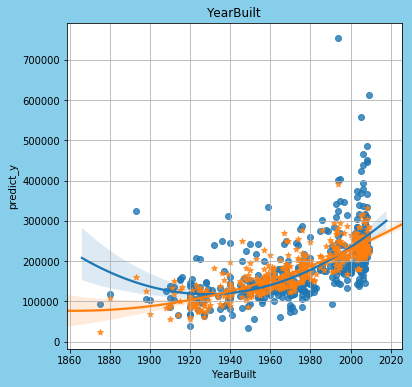

In [40]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()


# plot a cross section of mt.Fuji
plt.title("YearBuilt")
# plt.xlabel("YearBuilt")
# plt.ylabel("loss")


sns.regplot('YearBuilt', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('YearBuilt', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

### 【問題5】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。



$$
\begin{align}
\theta_j:&=\theta_j-\dfrac{\partial}{\partial \theta_j}J(\theta)\\
&=\theta_j-\dfrac{\partial}{\partial \theta_j}\dfrac{1}{2m}\sum_{i=1}^{m}\bigl(h_\theta(x^i)-y^i)\bigr)^{2}\\
&=\theta_j-\dfrac{1}{2m}\sum_{i=1}^{m}2\cdot\bigl(h_\theta(x^i)-y^i\bigr)\cdot\bigl(h_\theta(x^i)-y^i\bigr)'\\
&=\theta_j-\dfrac{1}{m}\sum_{i=1}^{m}\bigl(h_\theta(x^i)-y^i\bigr)\cdot(x_j^i)\\
\end{align}
$$

### 【問題6】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

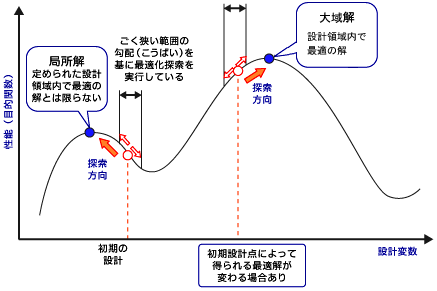

In [77]:
# plan
import os
import os.path
from IPython.display import display
from PIL import Image

path1 = "kyokusho.gif"
display(Image.open(path1))

### 【問題7】スクラッチで学べることは何か
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か
注意点
感想ではなく、他人を納得させられるような内容にしてください。

<br>・標準化が必要かどうかを確認できる。
<br>・パラメータ数値の更新がどのように行われているかの可視化できる。
<br>・クラスの構造への理解ができる(インスタンス変数、イニシャル変数など)